# Multi Dimensional Scaling (MDS) 

Multi-Dimesional Scaling (MDS) est une technique de data visualisation qui permet de représenter des données multidimensionnelles dans un espace de dimension réduite. L'idée est de trouver une représentation en 2D ou 3D des données qui préserve au mieux les distances entre les points. Il existe 2 types de MDS : 
- MDS métrique : on cherche à représenter les données de telle sorte que les distances entre les points soient les plus proches possibles des distances d'origine.
- MDS non métrique : on cherche à représenter les données de telle sorte que les distances entre les points soient les plus proches possibles des rangs des distances d'origine. Autrement dit, on cherche à préserver l'ordre des distances.

## Analyse en composantes principales (ACP)

On se rappelle ici l'algorithme de l'ACP. Soit $X$ une matrice de données de dimension $n \times p$ où $n$ est le nombre d'observations et $p$ est le nombre de variables. L'ACP consiste à trouver les vecteurs propres de la matrice de covariance $C = \frac{1}{n}X^TX$.

1. Centrer les données : $X_c = X - \bar{X}$
2. Calculer la matrice de covariance : $C = \frac{1}{n}X_c^TX_c$
3. Trouver les vecteurs propres de $C$ : $Cv = \lambda v$
4. Calculer les valeurs propres : $\lambda$
5. Calculer les composantes principales : $Z = X_cv$
6. Choisir les $k$ premiers vecteurs propres pour réduire la dimension

Il s'agit en fait d'un cas particulier de la MDS métrique où les distances sont définies par les produits scalaires entre les points c'est-à-dire $d_{ij} = \sqrt{(x_i - x_j)^T(x_i - x_j)}$, la distance euclidienne.

## Algorithme de la MDS

L'algorithme de la MDS (euclidienne) est le suivant :

1. Calculer la matrice de distances euclidienne $D=X^TX$
2. Centrer la matrice de distances : $H = I - \frac{1}{n}11^T$.
3. Calculer la matrice de similarité : $B = -\frac{1}{2}H D H$
4. Trouver les vecteurs propres de $B$ : $Bv = \lambda v$
5. Calculer les valeurs propres : $\lambda$
6. Calculer les composantes principales : $Z = Xv$
7. Choisir les $k$ premiers vecteurs propres pour réduire la dimension

On voit que l'algorithme de la MDS est très similaire à celui de l'ACP.
Cette approche par décomposition en valeurs propres est possible car on utilise la distance euclidienne. En fait, la MDS peut être formulée comme un problème d'optimisation où on cherche à minimiser la différence entre les distances d'origine et les distances dans l'espace de dimension réduite. Formellement, on cherche à minimiser la fonction de coût suivante :

$$
\sum_{j\neq i}^{n}(d_{ij} - \lVert x_i - x_j \rVert _2)^2
$$

où $d_{ij}$ est la distance d'origine entre les points $i$ et $j$ et $\lVert x_i - x_j \rVert _2$ est la distance  EUCLIDIENNE entre les observations $i$ et $j$ dans l'espace de dimension réduite.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Importations des données

Test1 = pd.read_csv('exampledata/3-holdout/pasture/matlab/test_pasture.0', sep=' ', header=None)
Train1 = pd.read_csv('exampledata/3-holdout/pasture/matlab/train_pasture.0', sep=' ', header=None)


# Données brutes
X = pd.concat([Train1, Test1]) # Pas besoin de séparer les données en train et test

# On nomme les colonnes
X.columns = [f'x{i}' for i in range(1, len(X.columns))] + ['y'] 

# Convertir la colonne 'y' en type entier
X['y'] = X['y'].astype(int)


# On sépare les données en features et target
X_features = X.iloc[:, :-1]
y = X['y']

# On determine les classes de la target
classes = y.unique()

# On crée un dictionnaire pour associer les classes à des couleurs
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))


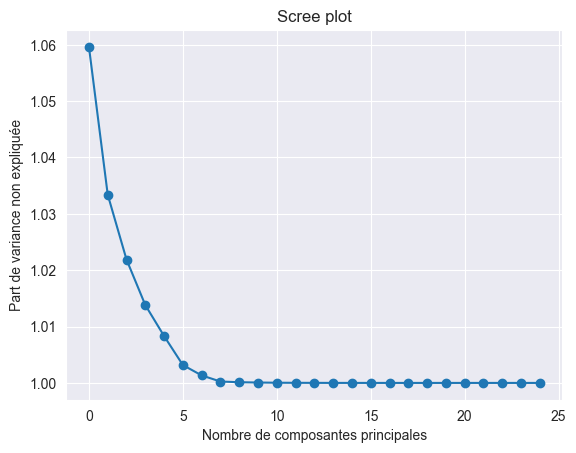

In [3]:
# PCA scree lot pour déterminer le nombre de composantes principales à garder
pca = PCA()
pca.fit(X_features)
explained_variance = pca.explained_variance_ratio_
plt.plot(1/np.cumsum(explained_variance), marker='o')
plt.title('Scree plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Part de variance non expliquée')
plt.show()

C:\Users\alexe\AppData\Local\Temp\ipykernel_26592\1238596999.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(transformed_pca_2[y == i, 0], transformed_pca_2[y == i, 1], c=c, label=i)


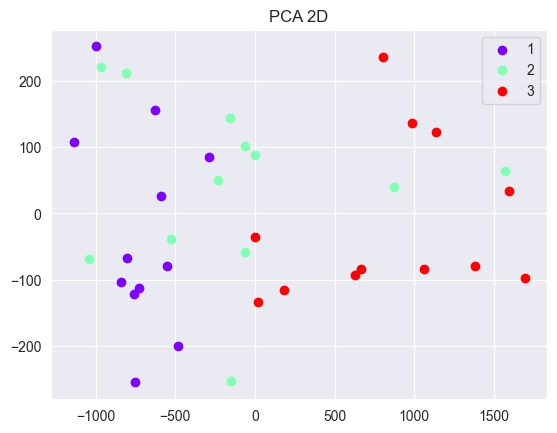

C:\Users\alexe\AppData\Local\Temp\ipykernel_26592\1238596999.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(transformed_pca_3[y == i, 0], transformed_pca_3[y == i, 1], transformed_pca_3[y == i, 2], c=c, label=i)


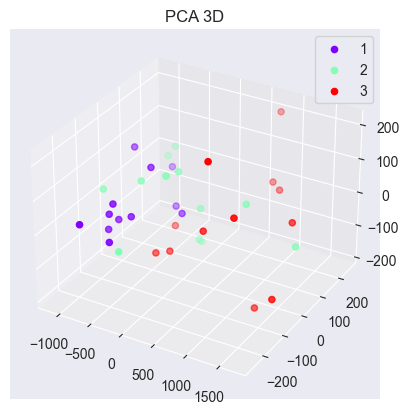

In [4]:
# calcul de la PCA avec 2 et 3 composantes principales
pca = PCA(n_components=2)
transformed_pca_2 = pca.fit_transform(X_features)

# Plot des données en 2D
plt.figure()
for i, c in zip(classes, colors):
    plt.scatter(transformed_pca_2[y == i, 0], transformed_pca_2[y == i, 1], c=c, label=i)
plt.title('PCA 2D')
plt.legend()
plt.show()

# plot en 3D
pca = PCA(n_components=3)
transformed_pca_3 = pca.fit_transform(X_features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in zip(classes, colors):
    ax.scatter(transformed_pca_3[y == i, 0], transformed_pca_3[y == i, 1], transformed_pca_3[y == i, 2], c=c, label=i)
plt.title('PCA 3D')
plt.legend()

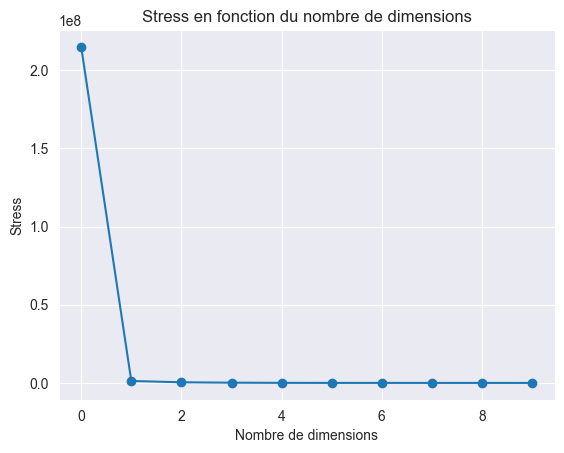

In [5]:
# MDS
# affichage du stress en fonction du nombre de dimensions
stress = []
for i in range(1, 11):
    mds = MDS(n_components=i, dissimilarity='euclidean',random_state=42)
    transformed_mds = mds.fit_transform(X_features)
    stress.append(mds.stress_)
plt.plot(stress, marker='o')
plt.title('Stress en fonction du nombre de dimensions')
plt.xlabel('Nombre de dimensions')
plt.ylabel('Stress')
plt.show()


C:\Users\alexe\AppData\Local\Temp\ipykernel_26592\3072959848.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(trasformed_mds_2[y == i, 0], trasformed_mds_2[y == i, 1], c=c, label=i)


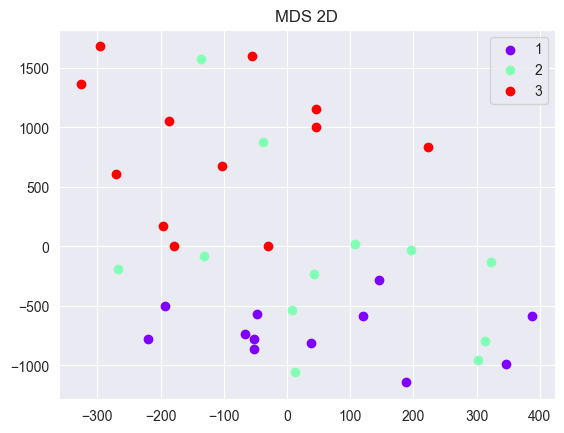

C:\Users\alexe\AppData\Local\Temp\ipykernel_26592\3072959848.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(trasformed_mds_3[y == i, 0], trasformed_mds_3[y == i, 1], trasformed_mds_3[y == i, 2], c=c, label=i)


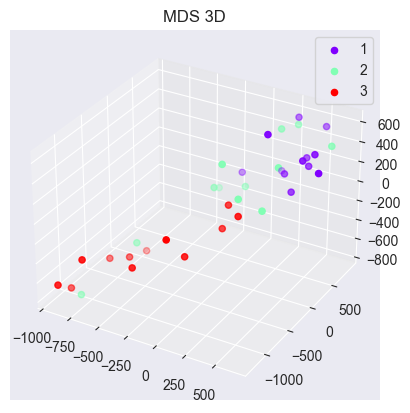

In [6]:

# calcul de la MDS (euclidean) avec 2 composantes principales
mds = MDS(n_components=2, dissimilarity='euclidean')
trasformed_mds_2 = mds.fit_transform(X_features)

# plot des données en 2D
plt.figure()
for i, c in zip(classes, colors):
    plt.scatter(trasformed_mds_2[y == i, 0], trasformed_mds_2[y == i, 1], c=c, label=i)
plt.title('MDS 2D')
plt.legend()
plt.show()

# calcul de la MDS (euclidean) avec 3 composantes principales
mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42)
trasformed_mds_3 = mds.fit_transform(X_features)

# plot des données en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c in zip(classes, colors):
    ax.scatter(trasformed_mds_3[y == i, 0], trasformed_mds_3[y == i, 1], trasformed_mds_3[y == i, 2], c=c, label=i)
plt.title('MDS 3D')
plt.legend()

plt.show()

La structure des données est la même avec l'ACP et la MDS. Les différences sont seulement dû à la centralisation des données et à la matrice de similarité.

L'utilisation de la MDS ne se limite donc pas à la distance euclidienne. On peut utiliser d'autres distances comme la distance de Manhattan, la distance de Minkowski, la distance de Mahalanobis, etc.





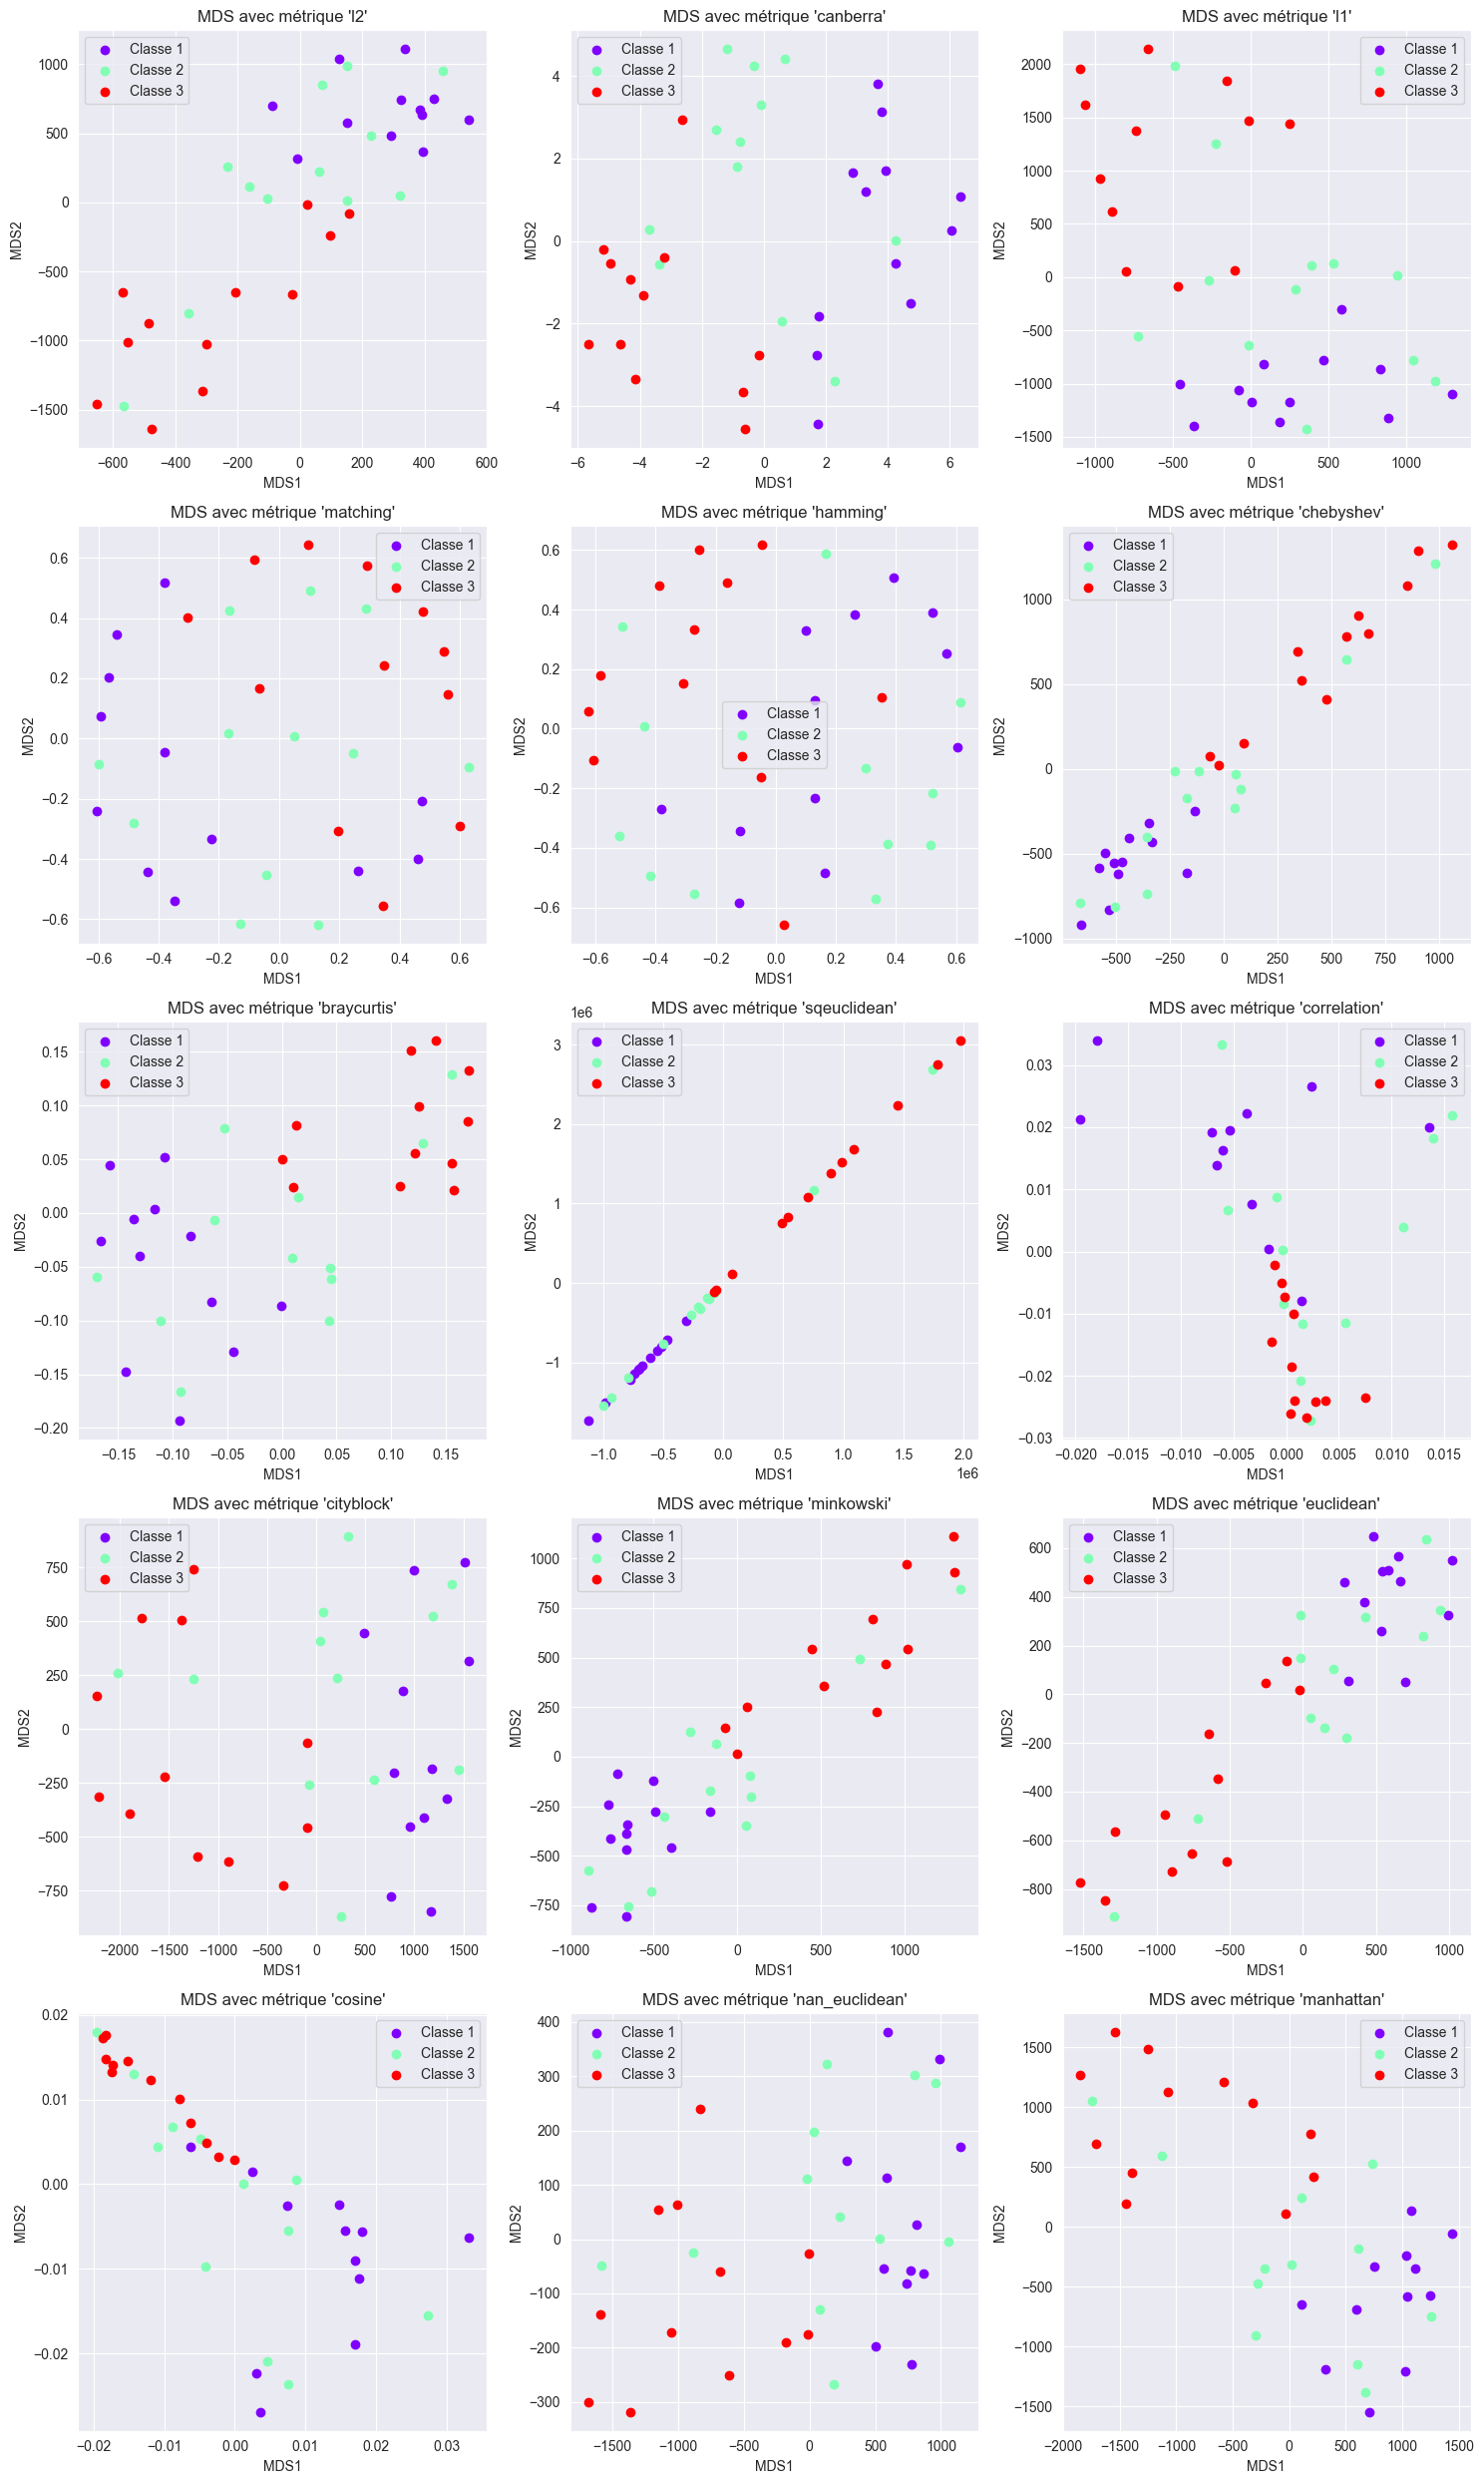

In [7]:
import math
import matplotlib.pyplot as plt

metrics = ['l2', 'canberra', 'l1', 'matching', 'hamming', 'chebyshev', 'braycurtis',
           'sqeuclidean', 'correlation', 'cityblock', 'minkowski', 'euclidean', 
           'cosine', 'nan_euclidean', 'manhattan']

num_metrics = len(metrics)
cols = 3  # Nombre de colonnes dans la grille
rows = math.ceil(num_metrics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    mds = MDS(n_components=2, dissimilarity='precomputed')
    dist = pairwise_distances(X_features, metric=metric)
    transformed = mds.fit_transform(X=dist)
    for cls, color in zip(classes, colors):
        idx = y == cls
        ax.scatter(transformed[idx, 0], transformed[idx, 1], label=f'Classe {cls}', color=color)
    ax.set_title(f"MDS avec métrique '{metric}'")
    ax.set_xlabel('MDS1')
    ax.set_ylabel('MDS2')
    ax.grid(True)
    ax.legend()

# Supprimer les axes inutilisés si le nombre de métriques n'est pas un multiple du nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



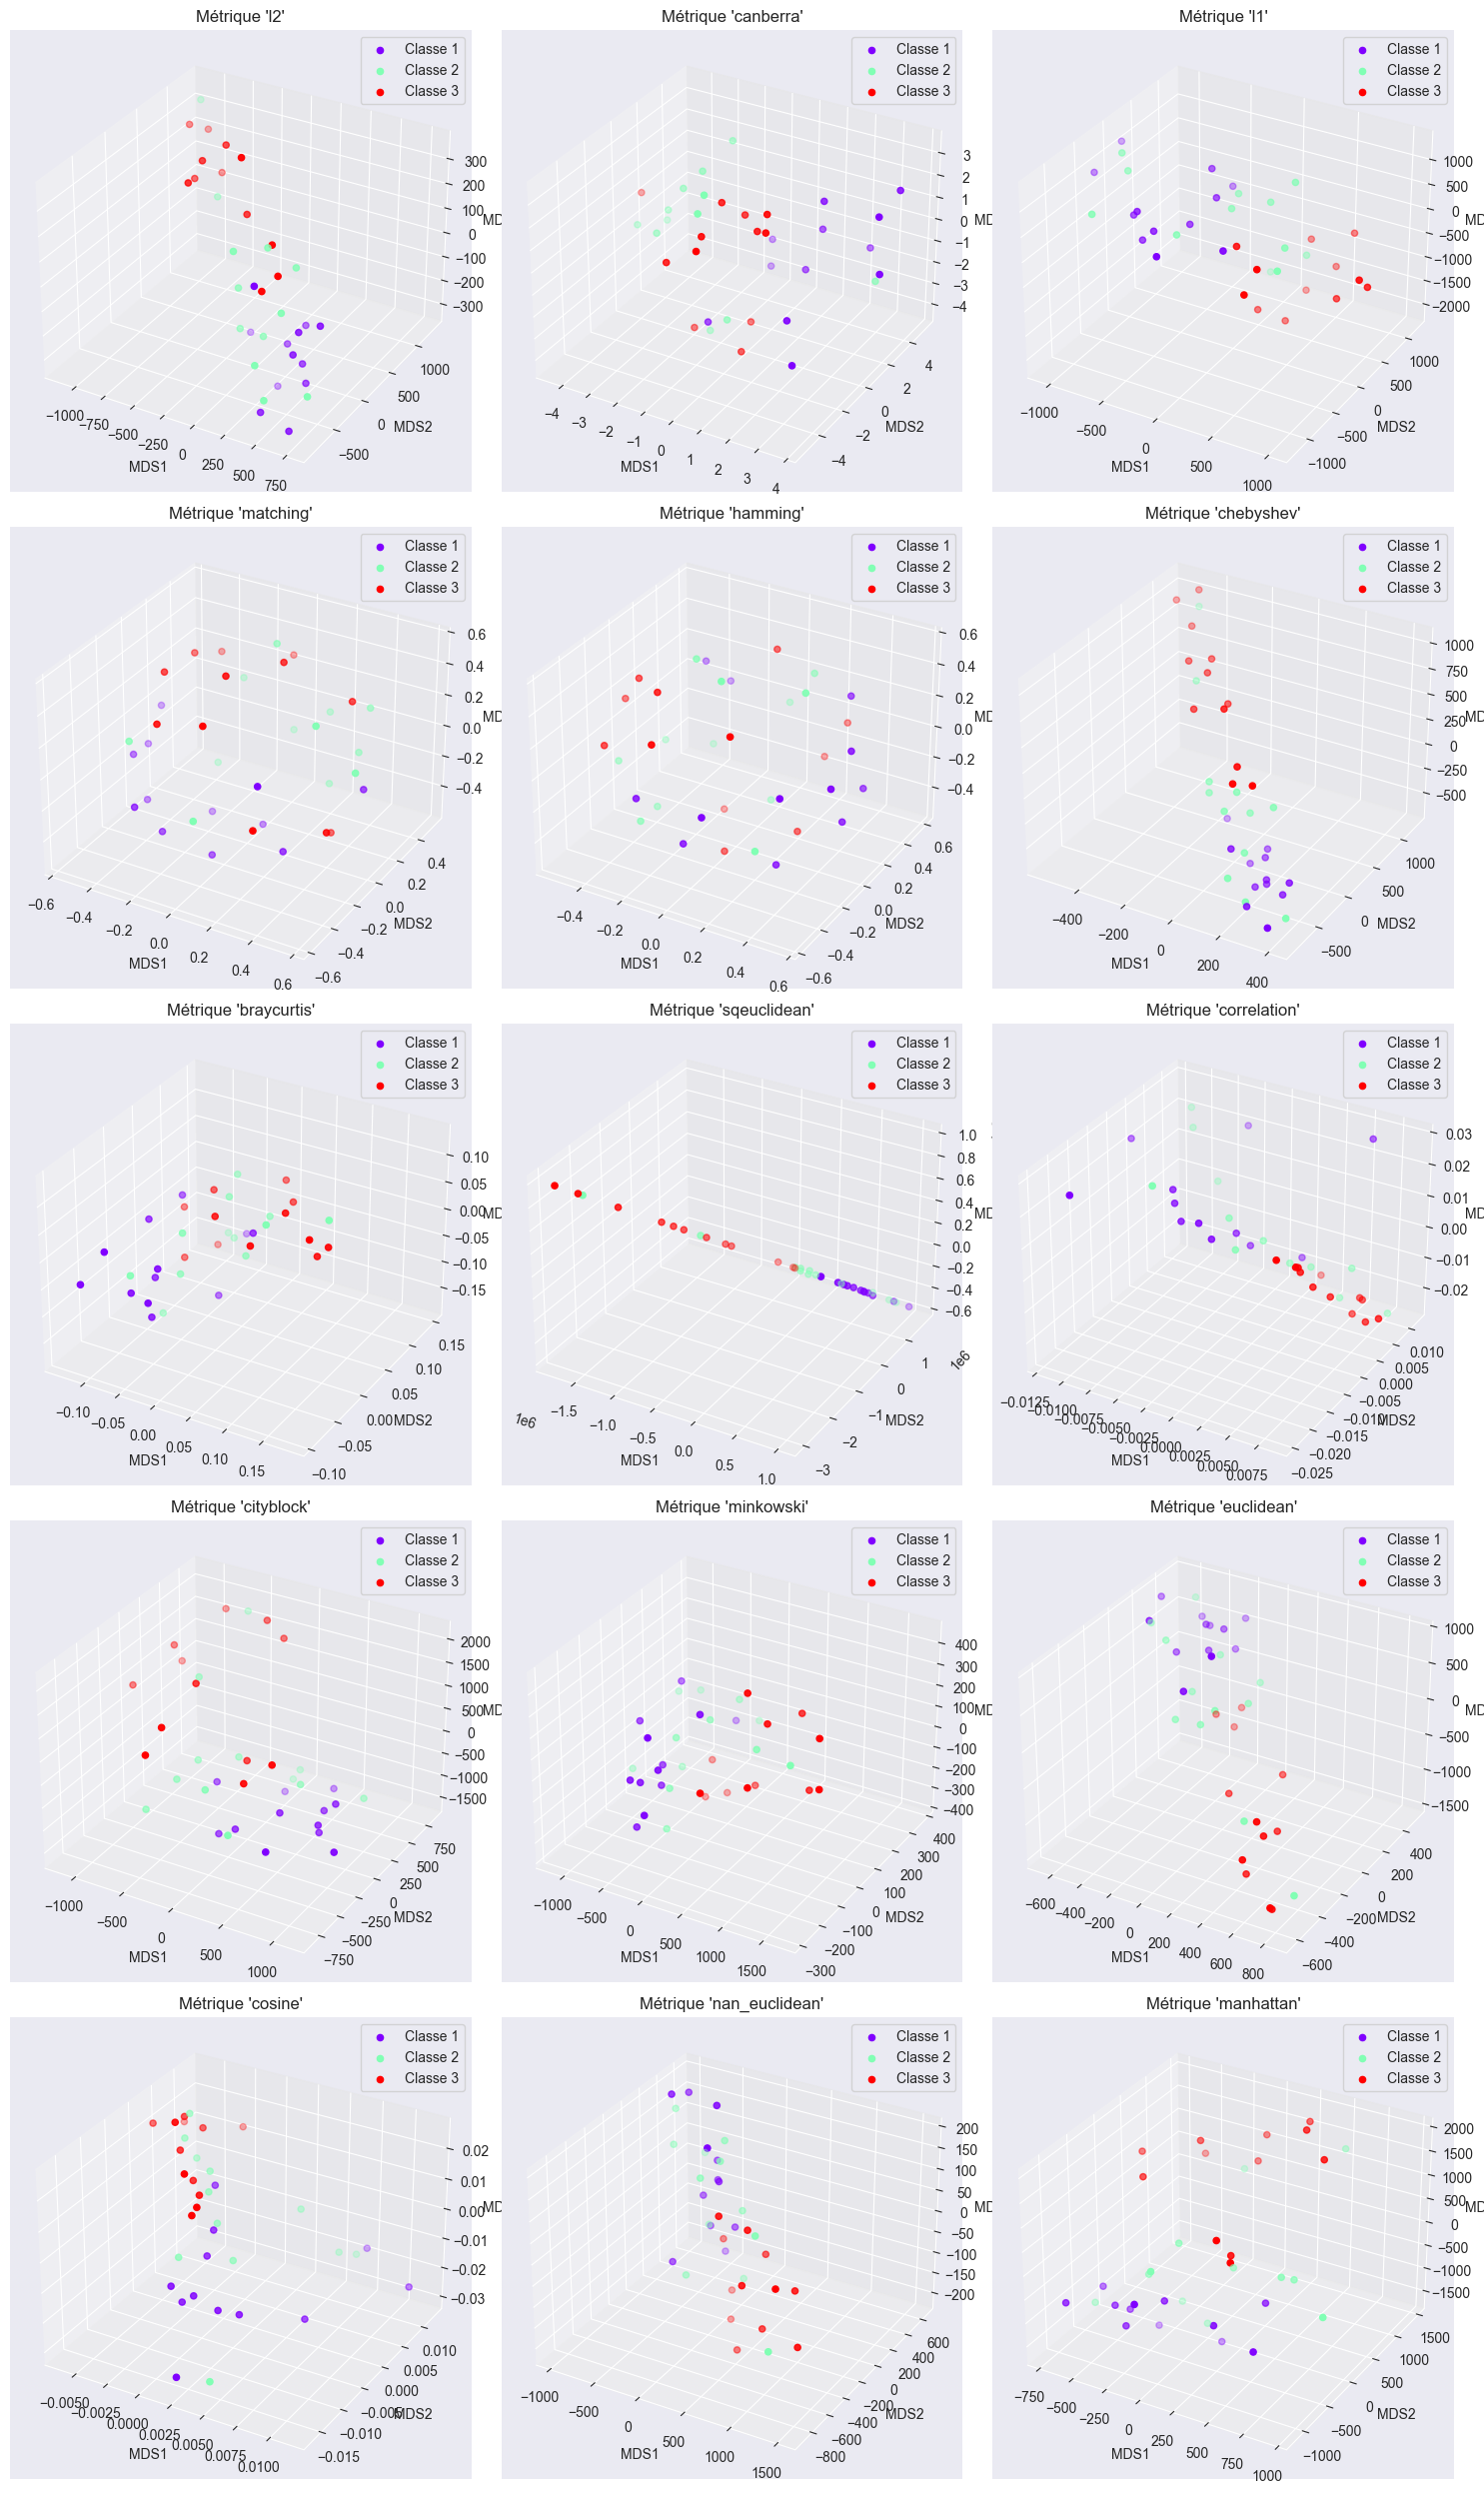

In [8]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pour les graphiques 3D

metrics = ['l2', 'canberra', 'l1', 'matching', 'hamming', 'chebyshev', 'braycurtis',
           'sqeuclidean', 'correlation', 'cityblock', 'minkowski', 'euclidean', 
           'cosine', 'nan_euclidean', 'manhattan']

num_metrics = len(metrics)
cols = 3  # Nombre de colonnes dans la grille
rows = math.ceil(num_metrics / cols)

fig = plt.figure(figsize=(15, 5 * rows))

for i, metric in enumerate(metrics):
    mds = MDS(n_components=3, dissimilarity='precomputed')
    dist = pairwise_distances(X_features, metric=metric)
    transformed = mds.fit_transform(X=dist)
    
    ax = fig.add_subplot(rows, cols, i + 1, projection='3d')
    for cls, color in zip(classes, colors):
        idx = y == cls
        ax.scatter(transformed[idx, 0], transformed[idx, 1], transformed[idx, 2], label=f'Classe {cls}', color=color)
    
    ax.set_title(f"Métrique '{metric}'")
    ax.set_xlabel('MDS1')
    ax.set_ylabel('MDS2')
    ax.set_zlabel('MDS3')
    ax.legend()

plt.tight_layout()
plt.show()

Le choix de la distance fait partie intégrante de l'art de la MDS. Il est important de bien choisir la distance en fonction de la nature des données. Par exemple, si les données sont des données de comptage, il est préférable d'utiliser la distance de Hellinger. Si les données sont des données de présence/absence, il est préférable d'utiliser la distance de Jaccard. Si les données sont des données de fréquence, il est préférable d'utiliser la distance de Chi2. Le choix est suggéré en partie par la nature des données et en partie par l'objectif de l'analyse.

L'objectif de la MDS métrique est donc de préserver au mieux les distances entre les points. Cependant, on peut vouloir chercher à présever uniquement l'ordre des distances. C'est l'objectif de la MDS non métrique.


La fonction de coût de la MDS non métrique est la suivante :

$$
\frac{\sum_{i < j} \left(d_{ij} - f\left(\lVert x_i - x_j \rVert \right) \right)^2 }{\sum_{i < j} d_{ij}^2}
$$



Dans ce cas la fonction $f$ est une fonction monotone croissante qui conserve donc l'ordre des distances sans garantir la distance exacte (comme la fonction racine carrée). Cette donction est déterminée par régression isotonique.

On notera que le facteur de normalisation $\sum_{i < j} d_{ij}^2$ est ajouté pour éviter l'éffondrement de la solution. En effet, si on ne l'ajoute pas, la solution optimale est de mettre tous les points au même endroit. En ajoutant ce facteur de normalisation, on s'assure que la solution optimale est non triviale.


La MDS non métrique à donc besoin d'optimiser deux objectifs simultanément : 
- Initialiser les $x_i$ aléatoirement 
- Faire jusqu'à un critère d'arrêt : 
    - Résoudre $f = \arg\min_f \sum_{i < j} \left(d_{ij} - f\left(\lVert x_i - x_j \rVert \right) \right)^2 $ par régression isotonique
    - Résoudre $x_1, x_2, ..., x_n = \arg\min_{x_1, x_2, ..., x_n} \sum_{i < j} \left(d_{ij} - f\left(\lVert x_i - x_j \rVert \right) \right)^2 $ par descente de gradient ou autre méthode d'optimisation


En procédent ainsi, on peut obtenir une représentation des données qui préserve l'ordre des distances sans garantir la distance exacte. C'est une méthode très utile pour la visualisation de données de grande dimension.



Pour conclure l'approche de la MDS est très similaire à celle de l'ACP. La différence réside dans la matrice de similarité et la distance utilisée. La MDS est une technique de data visualisation très utile pour la représentation de données multidimensionnelles.

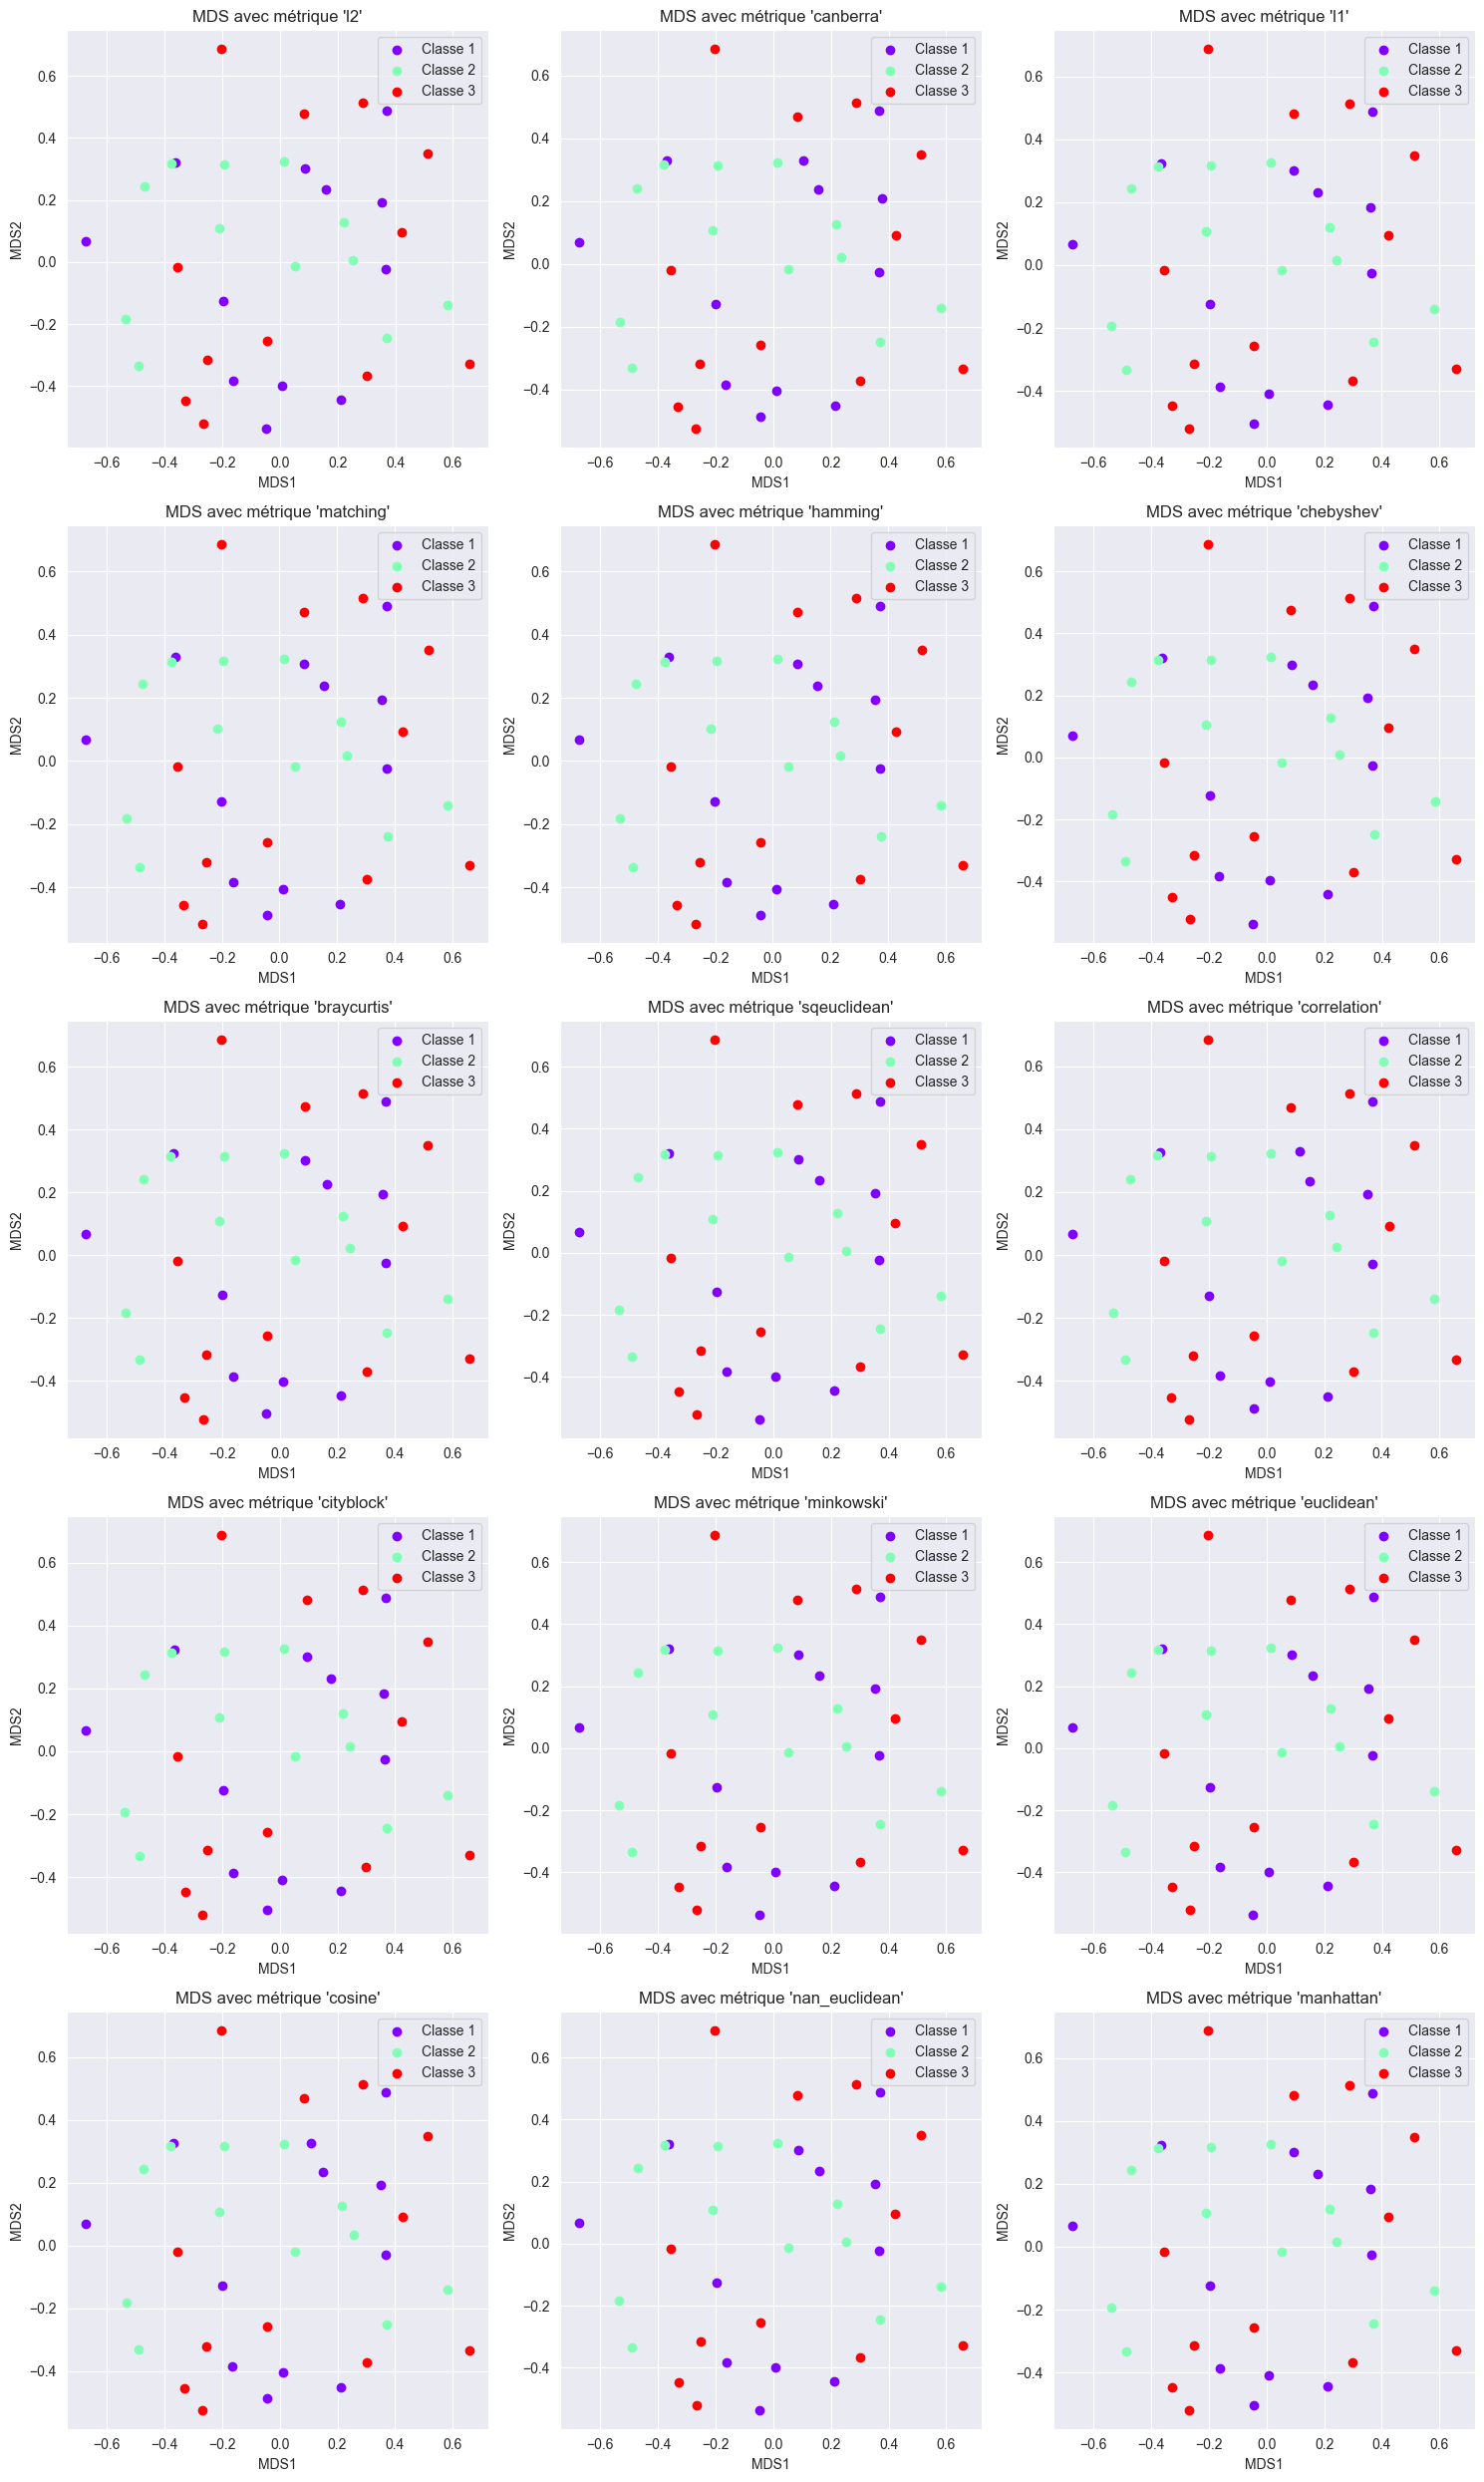

In [9]:
import math
import matplotlib.pyplot as plt

metrics = ['l2', 'canberra', 'l1', 'matching', 'hamming', 'chebyshev', 'braycurtis', 
           'sqeuclidean', 'correlation', 'cityblock', 'minkowski', 'euclidean', 
           'cosine', 'nan_euclidean', 'manhattan']

num_metrics = len(metrics)
cols = 3  # Nombre de colonnes dans la grille
rows = math.ceil(num_metrics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    # non-metric MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=False) # Notons random_state=42 pour l'initialisation aléatoire
    dist = pairwise_distances(X_features, metric=metric)
    transformed = mds.fit_transform(X=dist)
    for cls, color in zip(classes, colors):
        idx = y == cls
        ax.scatter(transformed[idx, 0], transformed[idx, 1], label=f'Classe {cls}', color=color)
    ax.set_title(f"MDS avec métrique '{metric}'")
    ax.set_xlabel('MDS1')
    ax.set_ylabel('MDS2')
    ax.grid(True)
    ax.legend()

# Supprimer les axes inutilisés si le nombre de métriques n'est pas un multiple du nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



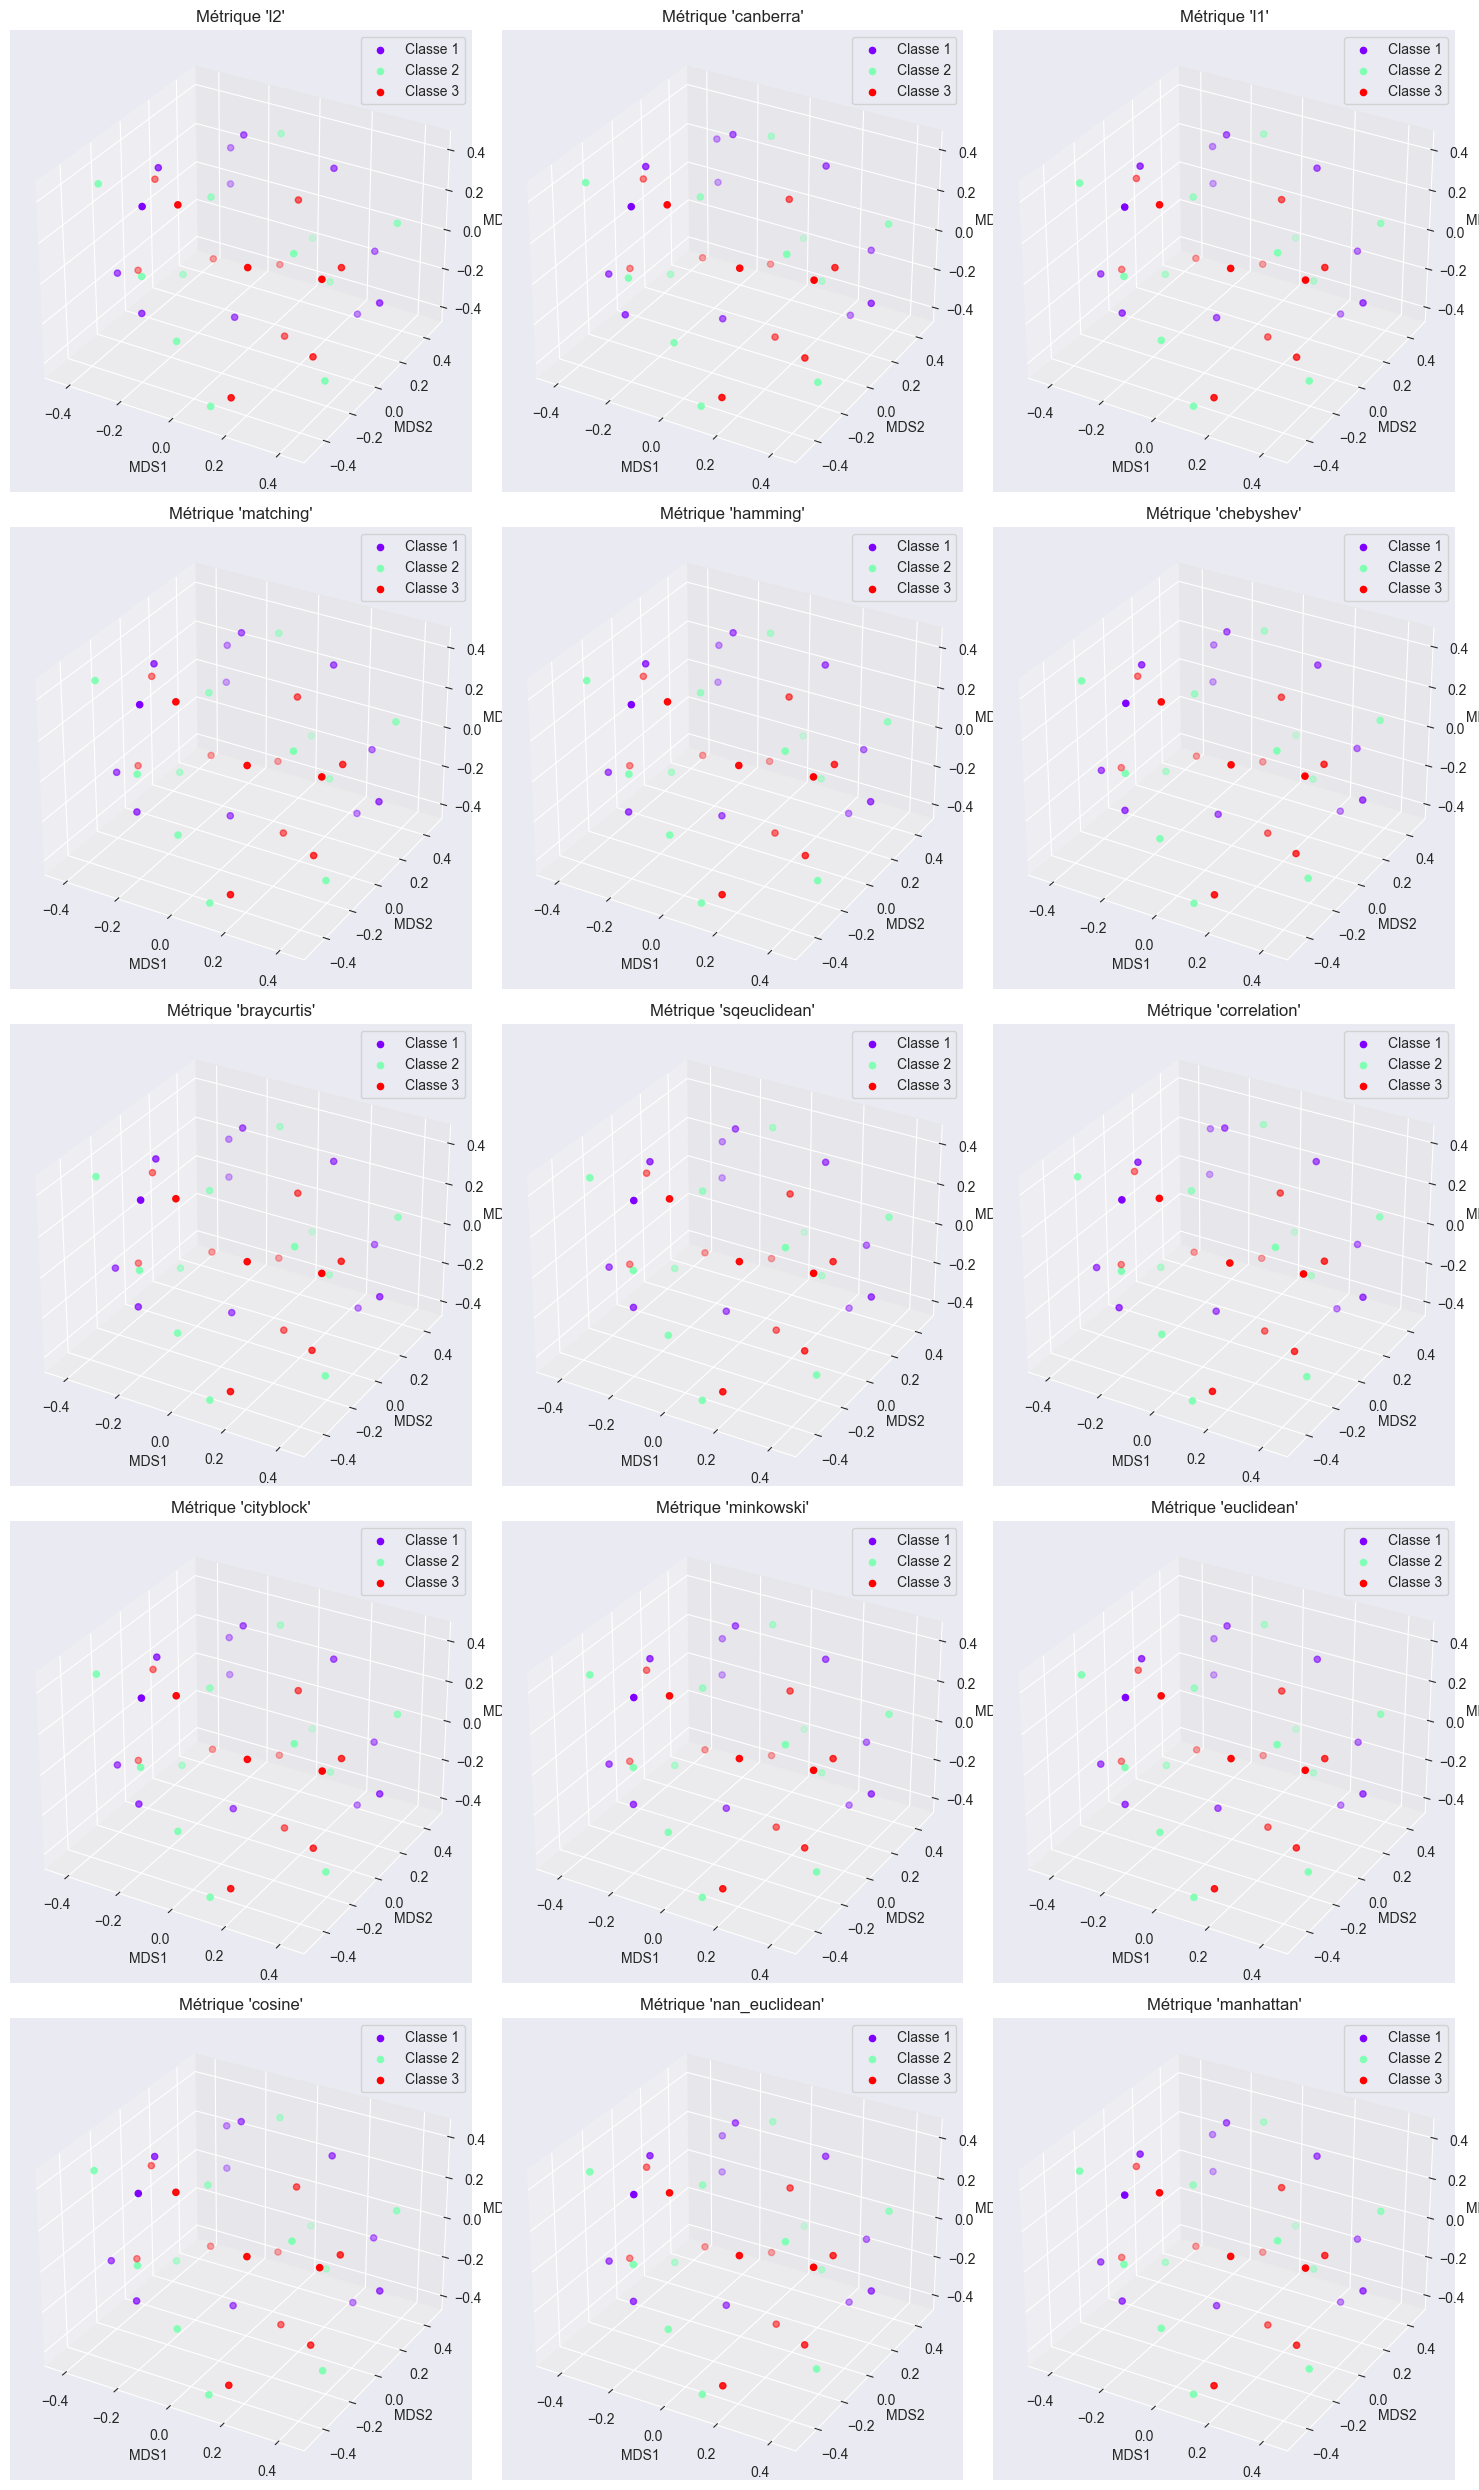

In [10]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import pour les graphiques 3D

metrics = ['l2', 'canberra', 'l1', 'matching', 'hamming', 'chebyshev', 'braycurtis', 
           'sqeuclidean', 'correlation', 'cityblock', 'minkowski', 'euclidean', 
           'cosine', 'nan_euclidean', 'manhattan']

num_metrics = len(metrics)
cols = 3  # Nombre de colonnes dans la grille
rows = math.ceil(num_metrics / cols)

fig = plt.figure(figsize=(15, 5 * rows))

for i, metric in enumerate(metrics):
    mds = MDS(n_components=3, dissimilarity='precomputed', metric=False, random_state=42)
    dist = pairwise_distances(X_features, metric=metric)
    transformed = mds.fit_transform(X=dist)
    
    ax = fig.add_subplot(rows, cols, i + 1, projection='3d')
    for cls, color in zip(classes, colors):
        idx = y == cls
        ax.scatter(transformed[idx, 0], transformed[idx, 1], transformed[idx, 2], label=f'Classe {cls}', color=color)
    
    ax.set_title(f"Métrique '{metric}'")
    ax.set_xlabel('MDS1')
    ax.set_ylabel('MDS2')
    ax.set_zlabel('MDS3')
    ax.legend()

plt.tight_layout()
plt.show()